# Image classification
### We will experiment with several ways to perform image classification.
### Let us begin by downloading the imagenet collection from http://image-net.org/ and down-sampling them for efficiency. Since the image collection is huge, we will only concern ourselves with the following subset of images:
### a. Plant, flora, plant life ( 1271 )
### b. Geological formation ( 1808 )
### c. Fungus ( 1207 )
### d. Sport ( 1888 )
### e. Person ( 1242 )
### f. Animal (1571)

In [38]:
from skimage.io import imread
from skimage.color import gray2rgb
from skimage.transform import resize

#Used to load files from directory
import os

# Reads every image file from specified directory (pertaining to a specific correct label)
# and appends each image and corresponding label to x_all and y_all respectively.
def read_files(directory, x_all, y_all, label):
    files = [] # This is just for keeping track of total # of files in the directory
    print("Reading files from {}...".format(directory))
    for filename in os.listdir(directory):  # Goes thru all files in directory
        files.append(os.path.join(directory, filename))
        x = imread(os.path.join(directory, filename))  # skimage built-in imread() method
        if len(x.shape) == 2:  # Some of these files may be in grayscale format, in which case the dimension of img is 2.
            x = gray2rgb(x)    # We will convert grayscale to RGB image format, which has 3 dimensions
        x = resize(x, (64,64,3), preserve_range=False, mode="reflect")  # For efficiency, we'll downsample image to size (64,64,3)
        x_all.append(x)     # append downsampled image file to list
        y_all.append(label) # append corresponding label to list
    print("Done. Total no. of files in directory {}: {}\n".format(directory, len(files)))
# end read_files

x_all = []
y_all = []
dir_animal = 'ImageNet_Downloads/animal/'
dir_fungus = 'ImageNet_Downloads/fungus/'
dir_geo = 'ImageNet_Downloads/geological_formation/'
dir_person = 'ImageNet_Downloads/person/'
dir_plants = 'ImageNet_Downloads/plants/'
dir_sport = 'ImageNet_Downloads/sport/'
dir_list = [dir_animal, dir_fungus, dir_geo, dir_person, dir_plants, dir_sport]
label_list = ['animal', 'fungus', 'geological', 'person', 'plants', 'sports']

# Read all image files from all the subdirectories and add them to x_all, and all the labels to y_all
for i in range(len(dir_list)):
    read_files(dir_list[i], x_all, y_all, label_list[i])

Reading files from ImageNet_Downloads/animal/...
Done. Total no. of files in directory ImageNet_Downloads/animal/: 1571

Reading files from ImageNet_Downloads/fungus/...
Done. Total no. of files in directory ImageNet_Downloads/fungus/: 1207

Reading files from ImageNet_Downloads/geological_formation/...


D:\Program_Files_Nospace\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 4718592 bytes but only got 0. Skipping tag 0
  "Skipping tag %s" % (size, len(data), tag))


Done. Total no. of files in directory ImageNet_Downloads/geological_formation/: 1808

Reading files from ImageNet_Downloads/person/...
Done. Total no. of files in directory ImageNet_Downloads/person/: 1242

Reading files from ImageNet_Downloads/plants/...
Done. Total no. of files in directory ImageNet_Downloads/plants/: 1271

Reading files from ImageNet_Downloads/sport/...
Done. Total no. of files in directory ImageNet_Downloads/sport/: 1888



### Now that we read in all the files and downsampled them, we'll plot just a few of the pictures for verification.

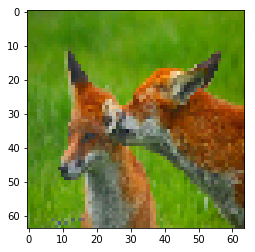

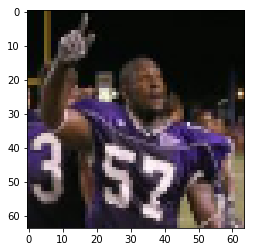

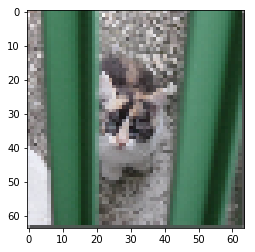

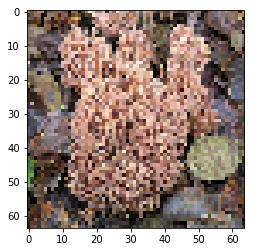

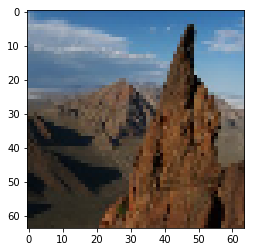

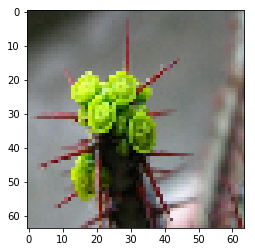

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_all[0])
plt.show()
plt.imshow(x_all[-1])
plt.show()
plt.imshow(x_all[1000])
plt.show()
plt.imshow(x_all[2000])
plt.show()
plt.imshow(x_all[4000])
plt.show()
plt.imshow(x_all[7000])
plt.show()


### Let's also verify the shape of x_all and see what one of its elements looks like.

In [5]:
import numpy as np
x_all_np = np.array(x_all)
print(x_all_np.shape)
print(x_all[0])

(8987, 64, 64, 3)
[[[ 0.29253791  0.48138117  0.08972312]
  [ 0.26659582  0.48791935  0.10566311]
  [ 0.33446978  0.49165901  0.13321078]
  ..., 
  [ 0.40077742  0.57201     0.09161688]
  [ 0.37155235  0.55568896  0.0453508 ]
  [ 0.37447534  0.55367647  0.05092869]]

 [[ 0.32547583  0.48959769  0.07475682]
  [ 0.30027765  0.48705289  0.10468176]
  [ 0.31098824  0.50473154  0.13716203]
  ..., 
  [ 0.38051854  0.57408088  0.0418189 ]
  [ 0.38088044  0.54920152  0.02598135]
  [ 0.3754902   0.54589461  0.01972082]]

 [[ 0.33392214  0.4984375   0.05725433]
  [ 0.32494638  0.50010532  0.10659946]
  [ 0.3432847   0.50009     0.13670343]
  ..., 
  [ 0.38165882  0.56644933  0.0376484 ]
  [ 0.36115483  0.54944183  0.0148629 ]
  [ 0.34709903  0.54320427  0.01021944]]

 ..., 
 [[ 0.46974763  0.61646944  0.32230679]
  [ 0.27652325  0.50338063  0.02109184]
  [ 0.44399989  0.59352022  0.17465342]
  ..., 
  [ 0.21430568  0.25815621  0.1490579 ]
  [ 0.32981579  0.37181277  0.25753772]
  [ 0.28555453  0

### We will now split the data into 80% train and 20% test set randomly.

In [6]:
import random
random.seed(2)

total_num_images = len(x_all)
num_train = round(.8*total_num_images)  # 80% training
num_test = total_num_images - num_train # rest is for testing

# Verifying the 80% / 20% split, and that they add up to the total no. of images
print('no. of training images: {}'.format(num_train))
print('no. of test images: {}'.format(num_test))
print('total no. of images (expected {}): {}'.format(total_num_images, num_train + num_test))

# Randomly select 20% indices for test set
indices_testing_set = set(random.sample(range(total_num_images), num_test))
# print(len(indices_testing_set))

# Initialize lists for training and testing data (and corresponding labels y_train and y_test)
x_train = []
x_test = []
y_train = []
y_test = []

# Populate x_train, x_test and corresponding y_train, y_test
for i in range(total_num_images):
    if i in indices_testing_set:
        x_test.append(x_all[i])
        y_test.append(y_all[i])
    else:
        x_train.append(x_all[i])
        y_train.append(y_all[i])

# Converting the lists into numpy arrays so they're easier to work with / more versatile
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

# Verifying the size of training and testing set
print("Size of training and testing set:")
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

no. of training images: 7190
no. of test images: 1797
total no. of images (expected 8987): 8987
Size of training and testing set:
x_train: (7190, 64, 64, 3)
y_train: (7190,)
x_test: (1797, 64, 64, 3)
y_test: (1797,)


# Convert the images into vectors.
### Now that we have train / test sets of images, we will use 4 different ways of converting these images to vectors: Autoencoder, Singular Value Decomposition, RGB histograms, and HSV histograms.
### The point is to try out different types of image representations and see how that affects the performance of our classification task.

# Autoencoder
### We will begin with autoencoder. We will use an architecture with mse and binary_crossentropy as the metric and loss. Since the current images are in RGB format, with shape (64,64,3), the code below accommodates this fact accordingly.

In [7]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(64, 64, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

encoder = Model(input_img, encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', metrics=['mse'], loss='binary_crossentropy')

Using TensorFlow backend.


### Here we are trying to represent the original images in encoded form, and the training code below reflects this. We will also try a relatively small batch size of 64 for more efficiency.

In [8]:
# train
history_1 = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 7190 samples, validate on 1797 samples
Epoch 1/10
7190/7190 [==============================] - 370s - loss: 0.6361 - mean_squared_error: 0.0522 - val_loss: 0.5778 - val_mean_squared_error: 0.0262
Epoch 2/10
7190/7190 [==============================] - 332s - loss: 0.5786 - mean_squared_error: 0.0269 - val_loss: 0.5696 - val_mean_squared_error: 0.0228
Epoch 3/10
7190/7190 [==============================] - 308s - loss: 0.5676 - mean_squared_error: 0.0225 - val_loss: 0.5615 - val_mean_squared_error: 0.0201
Epoch 4/10
7190/7190 [==============================] - 318s - loss: 0.5627 - mean_squared_error: 0.0206 - val_loss: 0.5585 - val_mean_squared_error: 0.0187
Epoch 5/10
7190/7190 [==============================] - 316s - loss: 0.5599 - mean_squared_error: 0.0195 - val_loss: 0.5579 - val_mean_squared_error: 0.0186
Epoch 6/10
7190/7190 [==============================] - 310s - loss: 0.5573 - mean_squared_error: 0.0184 - val_loss: 0.5559 - val_mean_squared_error: 0.0177
Epoch 7/10

### We want the encoded representations of each image for performing our classification task. So we use encoder.predict() here instead of using the decoder.

In [9]:
train_encoded_1 = encoder.predict(x_train)
test_encoded_1 = encoder.predict(x_test)

### In order to faciliate the classification task, we will reshape each encoded image into a 1D vector.

In [10]:
# Reshape each encoded image into a vector
print("Shape of encoded image train matrix before reshape: ", train_encoded_1.shape)
print("Shape of encoded image test matrix before reshape: ", test_encoded_1.shape)

x_train_autoencoder = train_encoded_1.reshape(
            (train_encoded_1.shape[0], train_encoded_1.shape[1]*train_encoded_1.shape[2]*train_encoded_1.shape[3])
                         )

x_test_autoencoder = test_encoded_1.reshape(
            (test_encoded_1.shape[0], test_encoded_1.shape[1]*test_encoded_1.shape[2]*test_encoded_1.shape[3])
)
print("After reshaping:")
print(x_train_autoencoder.shape)
print(x_test_autoencoder.shape)

Shape of encoded image train matrix before reshape:  (7190, 16, 16, 32)
Shape of encoded image test matrix before reshape:  (1797, 16, 16, 32)
After reshaping:
(7190, 8192)
(1797, 8192)


### The reshaped vector has length 16 x 16 x 32 = 8192, which makes sense.


# SVD

### We're done with autoencoder. Let's move on to Singular Value Decomposition. Here, we first represent each image as a vector by unfolding it. Then we will perform SVD on that matrix of vectors.

In [11]:
print("Vectorizing each image by unfolding it...")
x_train_vectorized = x_train.reshape(
                                     (x_train.shape[0], x_train.shape[1] * x_train.shape[2] * x_train.shape[3])
)
x_test_vectorized = x_test.reshape(
                                     (x_test.shape[0], x_test.shape[1] * x_test.shape[2] * x_test.shape[3])
)
print("Done. The shapes are:")
print(x_train_vectorized.shape)
print(x_test_vectorized.shape)


Vectorizing each image by unfolding it...
Done. The shapes are:
(7190, 12288)
(1797, 12288)


### We will use TruncatedSVD from sklearn.decomposition for performing the decomposition.
### We choose k = 15 here in an attempt ot strike a balance between having too large a value of k (which can result in too many features and possible overfitting, along with time efficiency concerns) and too small a value (which can result in essential features of an image getting lost or overlooked).

In [12]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(15)
x_train_svd = svd.fit_transform(x_train_vectorized)
x_test_svd = svd.transform(x_test_vectorized)
print("After SVD transformation, the shapes are:")
print(x_train_svd.shape, x_test_svd.shape)

After SVD transformation, the shapes are:
(7190, 15) (1797, 15)


# RGB Histograms
### Next, we represent each image as a RGB histogram vector using the custom method below.

In [13]:
# Given an image, returns a histogram of RGB counts, concatenated into a single vector
# Assumes that img has dimension 64 x 64 x 3
def get_hist(img):
    interval = 1 / 256
    img_reshaped = np.reshape(img, (64*64, 3))
    hist_list = []
    for c in range(3): # 3 colors (R,G,B)
        a = img_reshaped[:, c]  # Get all elements of the cth column
        bins = [i * interval for i in range(256 + 1)]
        hist,bins = np.histogram(a,bins) # make histogram of counts
        hist_list.extend(hist) # concatenate histograms to create a single vector containing counts for all RGB
    return np.array(hist_list) # return array version of this histogram vector.

### Let's test it out on a single image and view the resulting histogram vector.

In [14]:
hist = get_hist(x_train[-1])
print(hist)

[ 21  12  28  44 101 155 553  77  51  52  68  44  46  31  24  29  26  21
  18  27  22  21  19  22  13  19  23  18  26  17  34  25  28  18  16  30
  31  26  26  21  21  27  30  23  36  21  26  35  34  16  27  33  18  19
  22  21  23  20  31  26  15  29  28  17  25  21  19  20  23  21  20  23
  27  23  31  22  20  20  19  16  18  20   9  12  13  15  18  20  12  23
  14  13  19  10  13  10  17  18  14  12  17   9  11  11  14   9  17  12
  11  15   9   7  15  15   9  15   4  13  15  12  12  11  12   7   9   8
   9   7   4  13   7  10   7   4  10   5   5   7  11   7   6   9  10   6
   7   3   8  10   9  10   6  10   8   6  10  14  13   8  14   7   9   9
  11   9   4   7   9   4   7   7  11   9   6   6   6   2   4   6   9   7
   2   1   5   4   4   1   0   2   3   3   4   4   6   5   7   6   3   3
   1   2   2   5   0   2   3   3   1   3   2   5   1   0   6   3   3   2
   4   0   3   1   5   3   3   6   4   1   5   3   4   5   5   4   4   5
   4   1   2   2   4   3   5   6   0   2   3   7   

### We verify that the histogram vector has length 256 * 3 = 768.

In [15]:
print(hist.shape) # expected 256 * 3 = 768

(768,)


### Now we'll turn every image in train and test set into histogram vector.

In [16]:
x_train_rgb = []
for image in x_train:
    x_train_rgb.append(get_hist(image))
x_train_rgb = np.array(x_train_rgb)
print("x_train_rgb.shape: ", x_train_rgb.shape)

x_test_rgb = []
for image in x_test:
    x_test_rgb.append(get_hist(image))
x_test_rgb = np.array(x_test_rgb)
print("x_test_rgb.shape: ", x_test_rgb.shape)

x_train_rgb.shape:  (7190, 768)
x_test_rgb.shape:  (1797, 768)


# HSV histograms
### Lastly, we convert each image into a HSV histogram. To do this, we should first convert each image from RGB to HSV. There are several ways to do this, including colorsys, matplotlib and cv2. We will implement matplotlib here and use 256 bins for each H,S,V for simplicity.

In [17]:
import matplotlib
def get_hsv_hist(img):
    interval = 1 / 256
    img_hsv = matplotlib.colors.rgb_to_hsv(img)
    img_hsv_reshaped = np.reshape(img_hsv, (64*64, 3))
    hist_list = []
    for c in range(3): # 3 colors (R,G,B)
        a = img_hsv_reshaped[:, c]  # Get all elements of the cth column
#         print(a.shape)
        bins = [i * interval for i in range(256 + 1)]
        hist,bins = np.histogram(a,bins)
        hist_list.extend(hist)
    return np.array(hist_list)

### Let's try the above method on one image and see the resulting histogram vector:

In [18]:
hist = get_hsv_hist(x_train[-1])
print(hist)

[ 40  21  16  20  22  28  19  42  41  31  36  58  34  58  63  65  54  45
  56  37  45  47  22  24  26  29  35  30  23  32  23  18  24  15  28  21
  17  14   7   8   8   6  20   2   3  17   6   7   9   5   4   9   4   5
   3   2   6  10   5  12   8   5   6   3   4   1   3   2   4   9   5 666
   7   8   9   2   5   8   5   2   4   4   2   3   1   4   2   2   2   2
   3   2   5  39   6   1   6   4   2   0   0   6  12   2   2   4  25   6
   3   5   3   6   0   2   5   7   8  11   3   2   4   2  10   0   0   2
   4   3   1   3   3   0   0   1   2   1   2   3   1   3   3   1   4   8
   3   4   2   2   1   2   2   4   0   1   0   1   8   7   6   2   9   7
   3   2   3   2   1   2   2   2   7   1   6   3   7  13   3  13  11  18
  14  15  17  25  62  67  60  59  48  35  35  32  29  29  31  32  28  28
  22  16  12  31  28  19  11  11  15  14   6  11   9  14   9   6  11   8
  13   4   7   8  10  14   9  14   6  13  10  22   6  15  17  13  21  21
  15   9  15  14   9  16  21  35  14  12  16  13  1

### We're ready to do the conversion for every image in train and test set.

In [19]:
x_train_hsv = []
for image in x_train:
    x_train_hsv.append(get_hsv_hist(image))
x_train_hsv = np.array(x_train_hsv)
print("x_train_hsv.shape: ", x_train_hsv.shape)

x_test_hsv = []
for image in x_test:
    x_test_hsv.append(get_hsv_hist(image))
x_test_hsv = np.array(x_test_hsv)
print("x_test_hsv.shape: ", x_test_hsv.shape)

x_train_hsv.shape:  (7190, 768)
x_test_hsv.shape:  (1797, 768)


# Classification
### Finally, we will compare classification results. Each of the four techniques above converted images into vectors. For each of the four techniques, we will:
### a. Use Euclidean distance and Pearson correlation coefficient to find the 5 nearest neighbors of each image.
### b. Use majority vote of the 5 NNs to determine the category of each image.
### c. Create a 6x6 confusion matrix for each distance metric whose rows index the true categories and whose columns index the predicted category values. Compute counts for each cell, and the overall accuracy of the system (percentage of correctly classified images).
### The corresponding 6 x 6 confusion matrices are defined as follows:
### confusion[i][j] = the count of situations where the predicted label was i for an image and the actual label was j.
### Clearly, we would prefer that the predicted and actual labels match, thus we would like the count to be greatest along the diagonal. 
### We will begin by writing the label prediction methods for each metric (Euclidean, Pearson).

In [27]:
from collections import Counter
from sklearn.metrics.pairwise import euclidean_distances

# Returns the most commonly occurring element in a list.
def most_common(lst):
    data = Counter(lst)
    return data.most_common(1)[0][0]

# Returns the predicted label given a test_img in a test set, the corresponding xtrain set and ytrain label set.
def predict_using_euclidean(xtrain, ytrain, test_img):
    # Compute the euc distance between test img and all images in the corresponding xtrain set
    distances = euclidean_distances(xtrain, [test_img])
    distances = distances.reshape((distances.shape[0],)) # transform to 1d array
#     print(distances.shape)
#     print(distances)

#     sorted_distances = np.sort(distances)
#     print(sorted_distances)
    
    # Now sort these distances. We want the top 5 (smallest-distance) nearest neighbors in the training set.
    # We use np.argsort to get the INDICES of the sorted distances, so we can look up the corresponding true labels
    # from ytrain.
    sorted_indices = np.argsort(distances)
#     print(sorted_indices[:5])
#     print(y_train[sorted_indices[:5]])  # top 5 nearest neighbors
    
    # We make a list of the correct labels for the top 5 indices, and invoke most_common() method above
    # to get the label that occurs most frequently (breaking ties randomly)
    # The resulting label is the predicted label for test_img.
    return most_common(ytrain[sorted_indices[:5]])

### The prediction function using pearson metric is similar to the above, except we want the LARGEST top 5 correlation values (as opposed to smallest 5 values as was the case above).

In [28]:
from scipy.stats import pearsonr
def predict_using_pearson(xtrain, ytrain, test_img):
#     print("xtrain:",xtrain)
#     print("test_img:",[test_img])
    corr_list = []
    for x in xtrain:
        corr = pearsonr(x,test_img)
        corr_list.append(corr[0])
#     sorted_corr_values = np.sort(corr_list)
    sorted_indices = np.argsort(corr_list)
    return most_common(ytrain[sorted_indices[-5:]])

### Now we will write methods for computing the overall accuracy ratio and confusion matrix.

In [29]:
# Increments the cell (i, j) by one, where:
# i = the row index pertaining to the correct label for a given image
# j = the col index pertaining to the predicted label for the image
# If i == j, then the predicted label happens to be correct.
def update_confusion_count(confusion, predicted_label, actual_label):
    i = label_list.index(actual_label) # recall label_list = ['animal', 'fungus', 'geological', 'person', 'plants', 'sports']
    j = label_list.index(predicted_label)
    confusion[i][j] += 1
    
# Returns the accuracy ratio as well as the cofusion matrix
# xtest: the test set
# xtrain: the train set
# ytrain: the training set of labels
# ytest: the testing set of labels
# func: the prediction function to invoke (i.e. predict_using_euclidean() or predict_using_pearson())
def get_predict_ratio(xtest, xtrain, ytrain, ytest, func):
    correct_predictions = 0
    confusion = np.zeros(shape=(6,6)) # initialize 6x6 array with all zeroes
    
    # Iterate thru every image in test set
    for i in range(len(xtest)):
        if i % 100 == 0:
            print("iteration",i)
        test_img = xtest[i]
        predicted_label = func(xtrain, ytrain, test_img) # predict label for that image
        actual_label = ytest[i]
    #     print(predicted_label, actual_label)
        if (predicted_label == actual_label):  # check if prediction is correct
    #         print("hit!")
            correct_predictions += 1
        
        # Regardless of whether prediction is correct, we update confusion matrix
        update_confusion_count(confusion, predicted_label, actual_label) 
    #end for i
    return correct_predictions / len(xtest), confusion

### We will now proceed to compute and print out the accuracy rating as well as confusion matrix for each of the 4 types of vectors (Autoencoder, SVD, RGB histogram, HSV histogram) and each of the 2 metrics (Euclidean, Pearson).
### The result will be a total of 4 x 2 = 8 confusion matrices and corresponding accuracy results.
### First, accuracy and confusion matrix for autoencoder using euclidean metric:

In [30]:
pred_ratio_encoder_euc, confusion_encoder_euc = get_predict_ratio(
    x_test_autoencoder, x_train_autoencoder, y_train, y_test, predict_using_euclidean
)
print(pred_ratio_encoder_euc)
print(confusion_encoder_euc)

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
0.37006121313299944
[[  88.   26.  142.   19.   32.   18.]
 [  31.   78.   86.    7.   32.    9.]
 [  30.    6.  282.   11.   18.    9.]
 [  45.   24.   90.   46.   20.    9.]
 [  30.   41.   73.    7.   86.    3.]
 [  69.   23.  180.   12.   30.   85.]]


### SVD using Euclidean:

In [31]:
pred_ratio_svd_euc, confusion_svd_euc = get_predict_ratio(
    x_test_svd, x_train_svd, y_train, y_test, predict_using_euclidean
)
print("Accuracy rate (SVD, Euclidean):", pred_ratio_svd_euc)
print("Confusion matrix:\n", confusion_svd_euc)

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
Accuracy rate (SVD, Euclidean): 0.41402337228714525
Confusion matrix:
 [[  82.   49.   55.   21.   46.   72.]
 [  13.  114.   26.   12.   29.   49.]
 [  28.   21.  201.   18.   22.   66.]
 [  41.   32.   29.   55.   23.   54.]
 [  29.   57.   27.   14.   94.   19.]
 [  60.   35.   62.   13.   31.  198.]]


### RGB Euclidean:

In [32]:
pred_ratio_rgb_euc, confusion_rgb_euc = get_predict_ratio(
    x_test_rgb, x_train_rgb, y_train, y_test, predict_using_euclidean
)
print(pred_ratio_rgb_euc)
print(confusion_rgb_euc)

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
0.3722871452420701
[[  77.   89.   54.   30.   48.   27.]
 [  26.  150.   17.   13.   25.   12.]
 [  70.   58.  162.   23.   24.   19.]
 [  34.   70.   28.   64.   15.   23.]
 [  30.   57.   32.   16.   96.    9.]
 [  70.   84.   58.   31.   36.  120.]]


### HSV Euclidean:

In [33]:
pred_ratio_hsv_euc, confusion_hsv_euc = get_predict_ratio(
    x_test_hsv, x_train_hsv, y_train, y_test, predict_using_euclidean
)
print(pred_ratio_hsv_euc)
print(confusion_hsv_euc)

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
0.4079020589872009
[[  79.  102.   48.   22.   51.   23.]
 [  25.  138.   23.    6.   34.   17.]
 [  59.   65.  156.   20.   27.   29.]
 [  27.   46.   43.   65.   19.   34.]
 [  20.   48.   19.    7.  137.    9.]
 [  46.   93.   42.   24.   36.  158.]]


### Autoencoder using Pearson:

In [34]:
pred_ratio_encoder_pear, confusion_encoder_pear = get_predict_ratio(
    x_test_autoencoder, x_train_autoencoder, y_train, y_test, predict_using_pearson
)
print(pred_ratio_encoder_pear)
print(confusion_encoder_pear)

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
0.41012799109627157
[[  97.   29.  106.   35.   43.   15.]
 [  26.   85.   74.   11.   36.   11.]
 [  29.   12.  263.   19.   17.   16.]
 [  31.   25.   71.   84.   10.   13.]
 [  27.   40.   56.   11.   97.    9.]
 [  50.   31.  141.   35.   31.  111.]]


### SVD using Pearson:

In [35]:
pred_ratio_svd_pear, confusion_svd_pear = get_predict_ratio(
    x_test_svd, x_train_svd, y_train, y_test, predict_using_pearson
)
print("Accuracy rate (SVD, Pearson):", pred_ratio_svd_pear)
print("Confusion matrix:\n", confusion_svd_pear)

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
Accuracy rate (SVD, Pearson): 0.4001112966054535
Confusion matrix:
 [[  91.   44.   62.   22.   43.   63.]
 [  19.  101.   42.   10.   38.   33.]
 [  29.   20.  183.   27.   19.   78.]
 [  46.   23.   47.   51.   18.   49.]
 [  34.   42.   34.   11.   98.   21.]
 [  66.   26.   67.   18.   27.  195.]]


### RGB using Pearson:

In [36]:
pred_ratio_rgb_pear, confusion_rgb_pear = get_predict_ratio(
    x_test_rgb, x_train_rgb, y_train, y_test, predict_using_pearson
)
print(pred_ratio_rgb_pear)
print(confusion_rgb_pear)

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
0.36783528102392876
[[  77.   67.   66.   41.   52.   22.]
 [  28.  114.   35.   20.   36.   10.]
 [  64.   43.  180.   29.   25.   15.]
 [  40.   52.   42.   66.   19.   15.]
 [  30.   47.   37.   17.  102.    7.]
 [  80.   48.   81.   34.   34.  122.]]


### And finally, HSV using Pearson:

In [37]:
pred_ratio_hsv_pear, confusion_hsv_pear = get_predict_ratio(
    x_test_hsv, x_train_hsv, y_train, y_test, predict_using_pearson
)
print(pred_ratio_hsv_pear)
print(confusion_hsv_pear)

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
0.4301613800779076
[[  95.   76.   68.   22.   48.   16.]
 [  33.  122.   39.   11.   29.    9.]
 [  56.   36.  205.   19.   16.   24.]
 [  30.   36.   47.   81.   16.   24.]
 [  28.   32.   27.   17.  130.    6.]
 [  58.   50.   88.   32.   31.  140.]]


### We note that the accuracy rate generally ranges from 36-43%. Although this rate may seem low, recall that a random guess has only a 1/6 chance of being correct (since there are a total of 6 labels), which our results outperform.
### We can also verify that the confusion matrices tend to contain the greatest values along the diagonal, as expected, meaning that there are more correct no. predictions when compared with each other incorrect prediction.
### It may be possible to improve performance further for some of these vectors, e.g. Autoencoder and SVD, respectively, by varying the autoencoder's architecture or by varying the value of k. Also, recall that the original images were downsampled to 64 x 64 x 3 for time efficiency; using higher resolution images may also improve performance.